harga sahabat lama


In [5]:
from typing import Any
import snscrape.modules.twitter as crawler
import re
import pandas as pd
import traceback
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text):
    stemmer = StemmerFactory().create_stemmer()
    hasil = stemmer.stem(text)
    return hasil
def remove_backslash_n(value: str) -> str:
    """"get rid \n from string"""
    return ' '.join(value.split())


def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

begone_emoji = get_emoji_regexp()

def preprocessing_data(text: Any) -> str:
    """"clean your data"""
    result = text.lower()
    result = re.sub(r'(@|https?)\S+|#[A-Za-z0-9_]+', '', result).replace("&amp;", "dan")
    result = re.sub(r'[^\w\s]', ' ', result)
    result = re.sub(r'\d', '', result)
    result = remove_backslash_n(result).strip()
    result = begone_emoji.sub(repl='', string=result)
    result = stemming(result)
    return result

In [4]:
from typing import Any
import snscrape.modules.twitter as crawler
import re
import pandas as pd
import traceback
import emoji

def remove_backslash_n(value: str) -> str:
    """"get rid \n from string"""
    return ' '.join(value.split())


def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

begone_emoji = get_emoji_regexp()

def preprocessing_data(text: Any) -> str:
    """"clean your data"""
    result = text.lower()
    result = re.sub(r'(@|https?)\S+|#[A-Za-z0-9_]+', '', result).replace("&amp;", "dan")
    result = re.sub(r'[^\w\s]', ' ', result)
    result = re.sub(r'\d', '', result)
    result = remove_backslash_n(result).strip()
    result = begone_emoji.sub(repl='', string=result)
    return result


query = '("e-Tilang" OR "etilang" OR "tilang elektronik" OR "etle" OR "e-tle")'
time_start = '2022-10-01'
time_end = '2022-10-31'
file_name = r'data oktober-des 2022 etilang tanpa lang dan etle.xlsx'
tweet_list = []
sheet_name = "data crawl oct-des 2022"
clean_data = False
try:
    for i, tweet in enumerate(
            crawler.TwitterSearchScraper(f'{query} until:{time_end} since:{time_start} lang:id').get_items()):
        try:
            if i > 15000:
                break
            if clean_data:
                clean_tweet = preprocessing_data(tweet.content)
                tweet_list.append(clean_tweet)
            else:
                tweet_list.append(tweet.content)
        except:
            pass

    print(f"{len(tweet_list)} tweets scraped!")
    print("removing duplicate tweets")
    result_ = list(set(tweet_list))
    print(f"{len(result_)} tweets left after cleaning")
    data_frame = pd.DataFrame(result_)

except:
    traceback.print_exc()


C:\Users\MSI\AppData\Local\Temp\ipykernel_25716\974655089.py:50: FutureWarning: content is deprecated, use rawContent instead
  tweet_list.append(tweet.content)


2433 tweets scraped!
removing duplicate tweets
2414 tweets left after cleaning


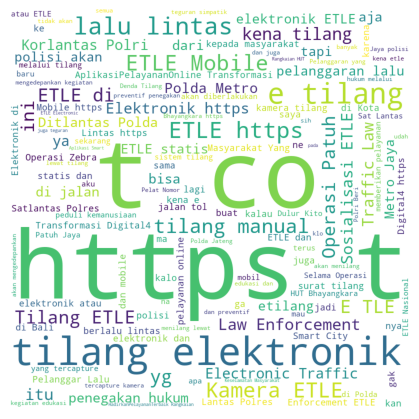

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopword = set(STOPWORDS)
comment_words = ''
for val in data_frame[0]:
    tokens = val.split()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopword,
                min_font_size = 9).generate(comment_words)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
new_list =[]
stemmer = StemmerFactory().create_stemmer()
for value in result_:
    temp = stemmer.stem(value)
    print(temp)
    new_list.append(temp)
new_list


In [22]:
data_frame = pd.DataFrame(result_)

In [10]:
from datetime import datetime
file_name = str(f'e-tilang + etle + lang_id jun-des 22.xlsx')
sheet_name = str('sheet-1')
data_frame.to_excel(file_name, sheet_name=sheet_name, index=False)

In [8]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

excel = pd.read_excel('data oktober-des 2022 etilang tanpa lang dan etle.xlsx')
df = pd.DataFrame(excel)


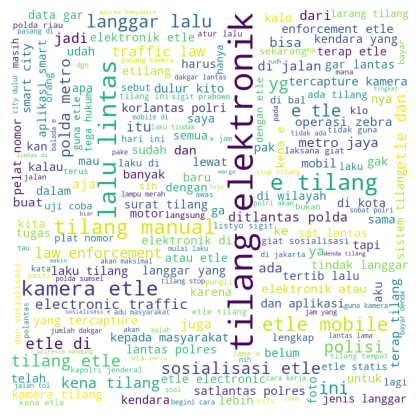

In [9]:
stopword = set(STOPWORDS)
comment_words = ''
for x in df[0]:
    y = preprocessing_data(x)
    tokens = y.split()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopword,
                min_font_size = 9).generate(comment_words)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopword = set(STOPWORDS)
comment_words = ''
for val in data_frame[0]:
    tokens = val.split()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopword,
                min_font_size = 9).generate(comment_words)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()